In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.cm as cm

import scipy
import scipy.cluster.hierarchy as sch
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
import skfuzzy as fuzz

from IPython.core.display import display, HTML
from datetime import datetime, timedelta
from rx import Observable, Observer
import os

pd.set_option('display.float_format', '{:.3g}'.format)

def getKey(item):
    return item[0]

In [2]:
from readAndSplitData_1 import streamHistData
from dataProcessFuncs_2 import correlDist, disInterCol, calcDataInfo
from clusteringAlgos_3 import fitPredict, getNameAl
from createGroups_4 import createGroupsObjs
from simulationInWeek_5 import simulInWeek
from dataByPlot import StorageSimulation

In [3]:
period=['1H','2H','4H','8H','1D']
lista = [{'index':i,'frec':f} 
              for i in range(1,5) 
              for f in period]

In [4]:
import pickle
f1 = open('dataToPlot','rb')
dataToPlot = pickle.load(f1)
f2 = open('dataCluster','rb')
dataCluster = pickle.load(f2)

In [5]:
colors = {}
for var,c in zip(range(1,5),['blue', 'red', 'green', 'black']): 
    colors[getNameAl(var)]=c

In [6]:
lis = {}
for p in period:
    lis[p]=[]
    
for key, value in dataToPlot.items():
    tem = pd.DataFrame([v[1] for v in value['listData']], columns=[key])
    tem.index = pd.to_datetime([v[0] for v in value['listData']])
    lis[key[-2:]].append(tem) 

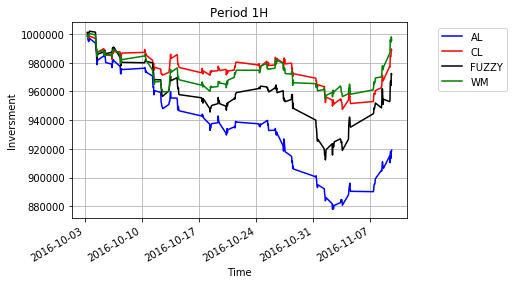

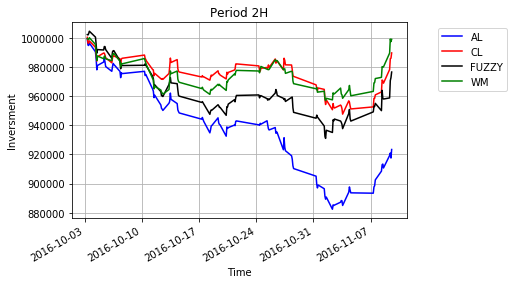

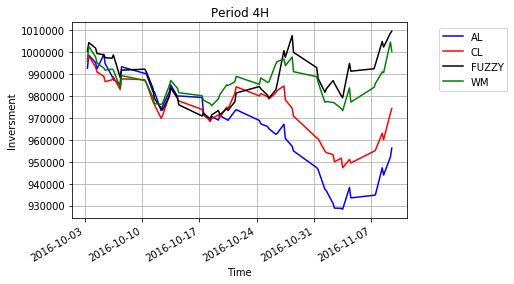

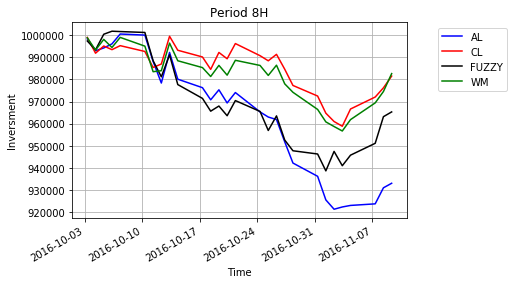

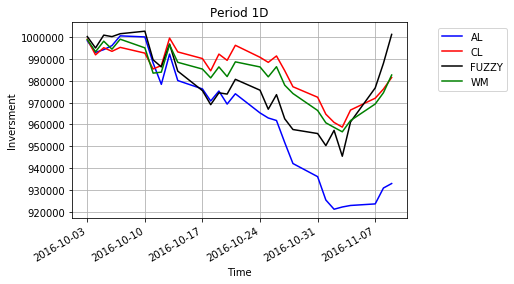

In [7]:
for key, value in lis.items():
    test=pd.concat(value, axis=1, join_axes=[value[0].index])
    fig, ax = plt.subplots()
    
    
    for k in sorted(test.columns):
        plt.plot(test[k], label=k[:-3], c=colors[k[:-3]])
    
    plt.ylabel('Inversment')
    plt.title('Period '+key)
    plt.xlabel('Time')
    
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.3, 0.65), loc=4, borderaxespad=0.)
    fig.autofmt_xdate()
    #plt.savefig(directory+'/'+str(indeximg)+'.png')
    #indeximg = indeximg + 1
    plt.show()

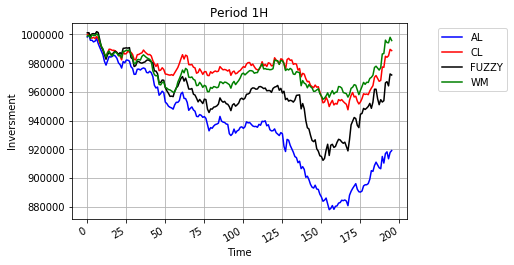

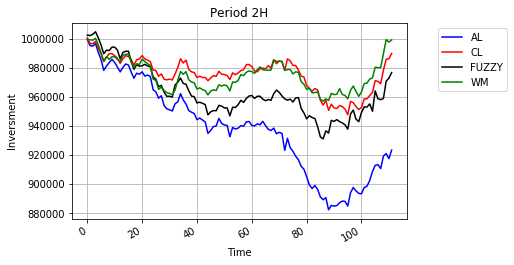

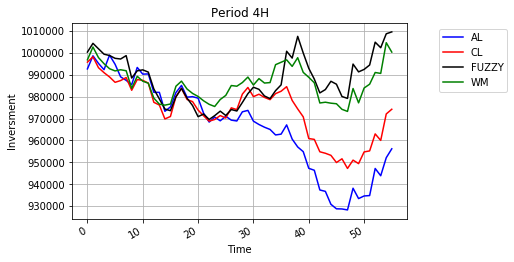

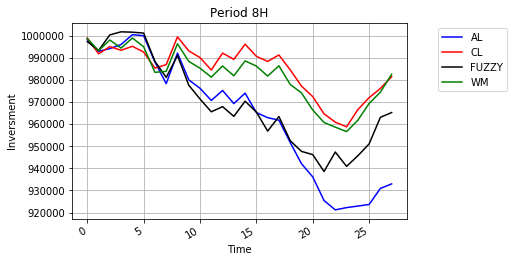

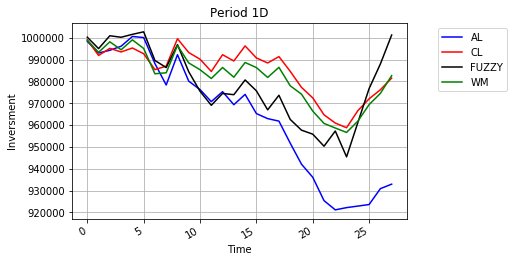

In [8]:
for key, value in lis.items():
    test=pd.concat(value, axis=1, join_axes=[value[0].index])
    fig, ax = plt.subplots()
    
    
    for k in sorted(test.columns):
        plt.plot(test[k].values.T, label=k[:-3], c=colors[k[:-3]])
    
    plt.ylabel('Inversment')
    plt.title('Period '+key)
    plt.xlabel('Time')
    
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.3, 0.65), loc=4, borderaxespad=0.)
    fig.autofmt_xdate()
    #plt.savefig(directory+'/'+str(indeximg)+'.png')
    #indeximg = indeximg + 1
    plt.show()

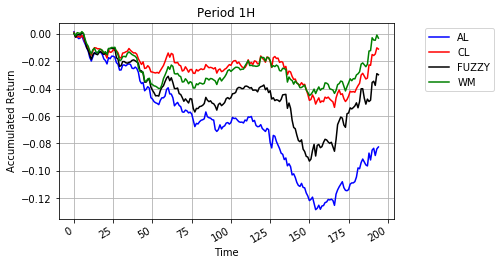

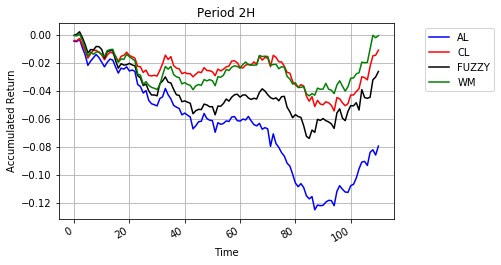

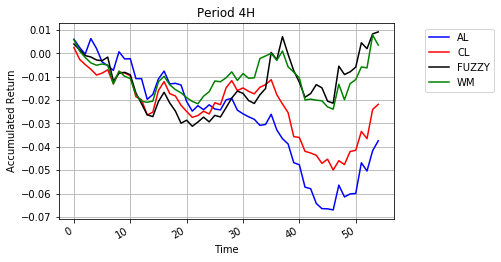

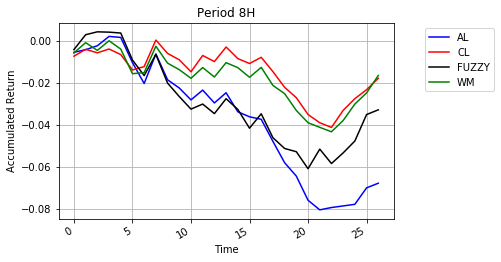

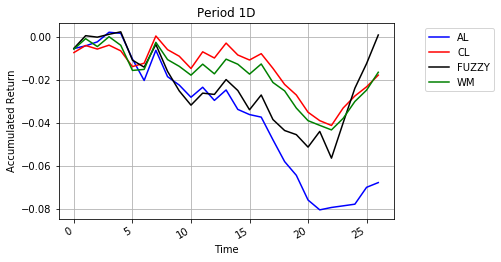

In [9]:
for key, value in lis.items():
    df = pd.concat(value, axis=1, join_axes=[value[0].index])
    rets = np.log(df) - np.log(df.shift(1))
    test = rets.drop(rets.index[[0]])
    test = test.cumsum(axis=0)
    
    fig, ax = plt.subplots()
    
    for k in sorted(test.columns):
        plt.plot(test[k].values.T, label=k[:-3], c=colors[k[:-3]])
    
    plt.ylabel('Accumulated Return')
    plt.title('Period '+key)
    plt.xlabel('Time')
    
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.3, 0.65), loc=4, borderaxespad=0.)
    fig.autofmt_xdate()
    
    #plt.savefig(directory+'/'+str(indeximg)+'.png')
    #indeximg = indeximg + 1
    plt.show()